# Generate some data

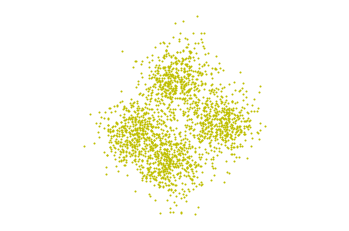

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Returns rotation matrix from angle
rotate = lambda angle: np.array([[np.cos(angle), -np.sin(angle)],
                                 [np.sin(angle),  np.cos(angle)]])

# Returns a cluster of 2D data
generate_cluster = lambda: np.random.randn(500, 2) + np.array([[0, 2.5]])

data = []
N_clusters = 4
for i in range(N_clusters):
    angle = 2*np.pi*i/N_clusters
    data.append(generate_cluster() @ rotate(angle + 0.2*np.random.randn()))
data = np.concatenate(data)

data_x, data_y = data[:,0], data[:,1]
plt.plot(data_x, data_y, 'y.', ms=2)

plt.axis('equal')
plt.axis(False)
plt.show()

# Perform k-means clustering using `sklearn`

In [2]:
from sklearn.cluster import KMeans

kmeans_less = KMeans(n_clusters=2).fit(data)
kmeans_same = KMeans(n_clusters=4).fit(data)
kmeans_more = KMeans(n_clusters=6).fit(data)

# Plot centroids

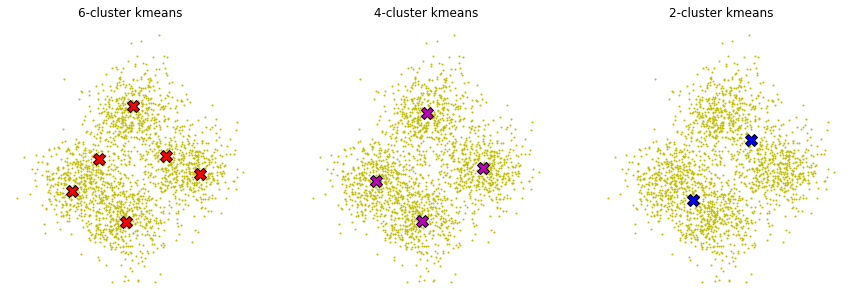

In [3]:
plt.figure(figsize=(15,5))
for idx, kmeans, color in [(1, kmeans_more, 'r'),
                           (2, kmeans_same, 'm'),
                           (3, kmeans_less, 'b')]:
    plt.subplot(1, 3, idx)
    plt.plot(data[:,0], data[:,1], 'y.', ms=2)
    plt.plot(*kmeans.cluster_centers_.T, 'X', color=color, ms=12, markeredgecolor='k')
    plt.title(f'{kmeans.n_clusters}-cluster kmeans')
    plt.axis('equal')
    plt.axis(False)
plt.show()

# Plot decision regions

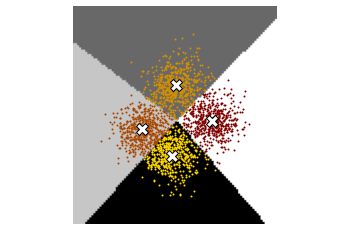

In [5]:
# Select one of the kmeans objects you created above
kmeans = kmeans_same

minX, minY = np.min(data, axis=0) - 2
maxX, maxY = np.max(data, axis=0) + 2

n_points = 100
meshX = np.linspace(minX, maxX, n_points)
meshY = np.linspace(minY, maxY, n_points)
X, Y = np.meshgrid(meshX, meshY)
Z = 0 * X
for i in range(meshX.shape[0]):
    for j in range(meshY.shape[0]):
        Z[i,j] = kmeans.predict([[X[i,j], Y[i,j]]])

fig = plt.imshow(Z,
           extent=[minX, maxX, minY, maxY],
           origin="lower", cmap='Greys')

for x, y, kmeans_label in zip(data[:,0], data[:,1], kmeans.labels_):
    color_min = matplotlib.colors.to_rgba_array('maroon')[0][:3]
    color_max = matplotlib.colors.to_rgba_array('gold')[0][:3]
    theta = kmeans_label / (kmeans.n_clusters - 1)
    color = color_min + theta * (color_max - color_min)
    plt.plot(x, y, '.', color=color, ms=2)
    
for x, y in zip(kmeans.cluster_centers_.T[0], kmeans.cluster_centers_.T[1]):
    plt.plot(x, y, 'wX', ms=12, markeredgecolor='k')

plt.axis('equal')
plt.axis(False)
plt.show()

# CHALLENGE TO STUDENT

**Challenge 1:**

Can you come up with a process that automatically determines (without a person looking at the data) the right number of clusters, $k$, to specify when performing kmeans? Hint: ask yourself how to measure the performance of your kmeans under a given $k$.

**Challenge 2:**

Can you come up with an example where it's better to first transform the data before applying kmeans? Hint: A simple example of a transformation would be to convert from cartesian to polar coordinates.